In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
raw = """0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2"""

In [52]:
with open('2021-12-05_input') as f:
    raw = f.read()

In [34]:
print(raw)

427,523 -> 427,790
94,639 -> 94,951
757,371 -> 465,663
503,935 -> 503,148
655,565 -> 655,951
167,754 -> 710,211
634,433 -> 245,433
449,889 -> 449,509
152,753 -> 207,808
301,90 -> 301,982
566,405 -> 482,405
758,741 -> 847,652
342,686 -> 921,107
741,317 -> 741,533
976,917 -> 976,664
273,272 -> 273,899
326,616 -> 326,478
483,906 -> 391,814
20,165 -> 20,349
860,533 -> 860,137
846,834 -> 846,610
155,923 -> 241,923
989,984 -> 17,12
711,681 -> 82,52
312,788 -> 312,281
319,746 -> 892,746
568,555 -> 757,555
659,450 -> 940,450
870,260 -> 870,487
110,794 -> 604,794
509,141 -> 509,99
29,68 -> 29,713
340,688 -> 820,688
428,46 -> 902,520
539,525 -> 539,210
181,822 -> 806,822
551,338 -> 551,79
894,542 -> 894,151
700,625 -> 700,60
143,736 -> 143,770
810,975 -> 54,219
44,373 -> 44,514
849,794 -> 120,794
347,690 -> 97,440
10,625 -> 57,625
541,202 -> 799,202
375,491 -> 809,925
271,474 -> 271,905
980,825 -> 980,908
600,751 -> 624,751
120,978 -> 958,140
262,916 -> 262,794
399,350 -> 399,666
623,270 -> 158,

[[0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 1 2 1 1 1 2 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [2 2 2 1 1 1 0 0 0 0]]
5


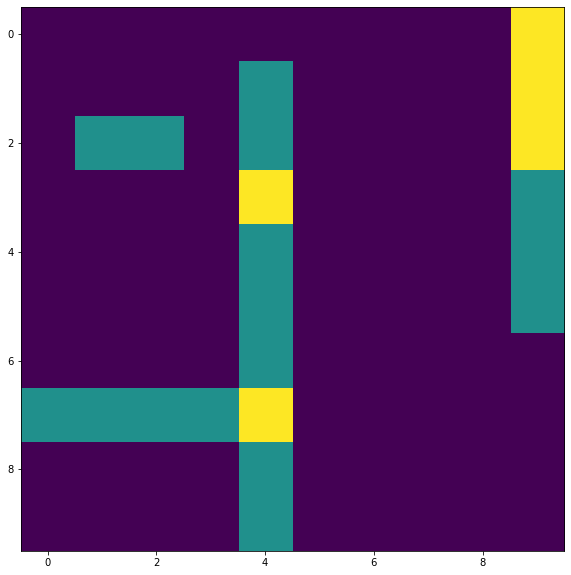

In [43]:
segments = []
for line in raw.split('\n'):  
    if not line:
        continue
    segments.append([[int(s) for s in substr.split(',')] for substr in line.split(' -> ')])
    
segments = np.array(segments)

size = segments.max() + 1
counts = np.zeros((size, size), dtype=np.int_)

for segment in segments:
#     print(segment)

    if segment[0][0] == segment[1][0]:
        if segment[1][1] > segment[0][1]:
            counts[segment[0][0],segment[0][1]:segment[1][1] + 1] += 1
        else:
            counts[segment[0][0],segment[1][1]:segment[0][1] + 1] += 1    
            
    if segment[0][1] == segment[1][1]:
        if segment[1][0] > segment[0][0]:
            counts[segment[0][0]:segment[1][0] + 1,segment[0][1]] += 1
        else:
            counts[segment[1][0]:segment[0][0] + 1,segment[0][1]] += 1    
        
#     print(counts.T)
    
print(counts.T)
plt.figure(figsize=(10, 10))
plt.imshow(counts)
print(counts[counts > 1].size)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
21038


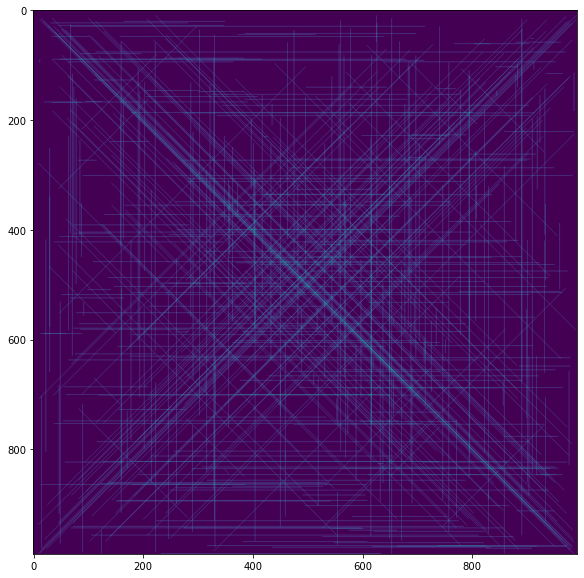

In [53]:
segments = []
for line in raw.split('\n'):  
    if not line:
        continue
    segments.append([[int(s) for s in substr.split(',')] for substr in line.split(' -> ')])
    
segments = np.array(segments)

size = segments.max() + 1
counts = np.zeros((size, size), dtype=np.int_)

for segment in segments:
    
    delta_x = segment[1][0] - segment[0][0]
    if delta_x:
        delta_x = delta_x // np.abs(delta_x)
    delta_y = segment[1][1] - segment[0][1]
    if delta_y:
        delta_y = delta_y // np.abs(delta_y)
        
#     print(delta_x, delta_y)
    
    x = segment[0][0]
    y = segment[0][1]
    counts[x,y] += 1
    while x != segment[1][0] or y != segment[1][1]:        
        x += delta_x
        y += delta_y
        counts[x,y] += 1
        
print(counts.T)
plt.figure(figsize=(10, 10))
plt.imshow(counts)
print(counts[counts > 1].size)    